In [40]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def floor(n):
    return np.floor(n).astype(np.uint8)

filename = "dude"
extension = "png"

In [43]:
def invert(im):
    im[:,:,:] = 255 - im[:,:,:]

def swapColors(im):
    im[:,:,(0,1,2)] = im[:,:,(2,1,0)]
    
def splitColor(im):
    im_R = im.copy()
    im_G = im.copy()
    im_B = im.copy()
    im_R[:,:,(1,2)] = 0
    im_G[:,:,(0,2)] = 0
    im_B[:,:,(0,1)] = 0
    im_RGB = np.concatenate((im_R,im_G,im_B),axis=1)
    return im_RGB

def colorReduction(im):
    # im32 = (im//8)*8
    # im16 = (im//16)*16
    # im8 = (im//32)*32
    im4  = (im//64)*64
    # im2 = (im//128)*128
    # im_dec = np.concatenate((im32,im16,im8),axis=1)
    # return im_dec
    return im4



In [38]:
im = np.array(Image.open(f"./images/src/{filename}.{extension}"))

# invert(im)
swapColors(im)
# im = splitColor(im)
# im = colorReduction(im)

pil_img = Image.fromarray(im)
pil_img.save(f"./images/temp/{filename}_pil_save.{extension}")

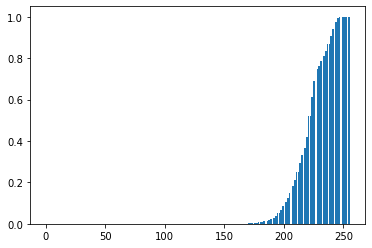

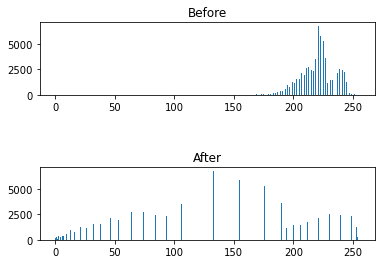

In [44]:
def histogram_equalization(im,plot_hist=False):
    f = {i:0 for i in range(256)}
    new_f = f.copy()
    pmf = f.copy()
    cdf = f.copy()
    (m,n) = im.shape
    N = m*n
    prev = 0
    
    # Calculate the frequency of each shade
    for i in range(m):
        for j in range(n):
            f[im[i,j]] += 1
    
    # Calculate the pmf
    for k in f:
        pmf[k] = f[k]/N
        
    # Calculate the cdf
    for k in pmf:
        cdf[k] = prev+pmf[k]
        prev = cdf[k]
        
    plt.bar(list(cdf.keys()),list(cdf.values()))
    
    new_im = im.copy()
    
    # Do the equalization
    for i in range(m):
        for j in range(n):
            new_im[i,j] = floor(255*cdf[im[i,j]])
            new_f[new_im[i,j]] += 1
    # res_im = np.concatenate((im,new_im),axis=1)
    res_im = new_im
    
    if plot_hist:
        fig, axs = plt.subplots(2)
        axs[0].set_title('Before')
        axs[0].bar(list(f.keys()),list(f.values()))
        axs[1].set_title('After')
        axs[1].bar(list(new_f.keys()),list(new_f.values()))
        fig.subplots_adjust(hspace=1)
    return res_im

im = np.array(Image.open(f"./images/src/{filename}.{extension}").convert('L'))

im = histogram_equalization(im,plot_hist=True)

pil_img = Image.fromarray(im)
pil_img.save(f"./images/temp/{filename}_pil_save.{extension}")

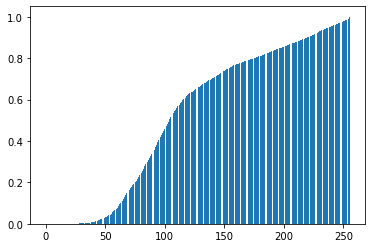

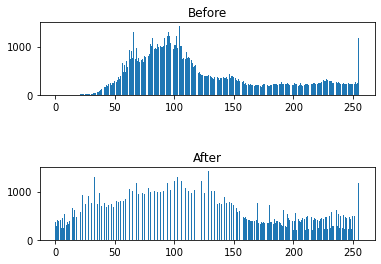

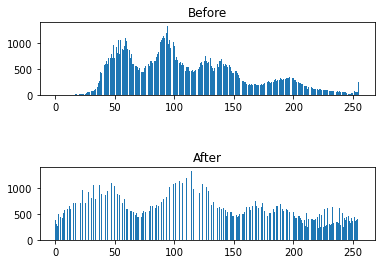

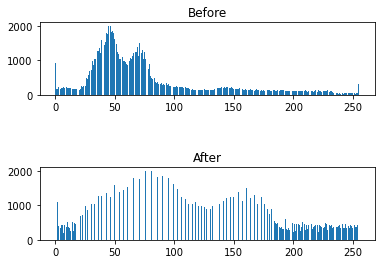

In [31]:
def histogram_equalization_color(im):
    if len(im.shape) != 3:
        raise Exception("Array should be three dimensional")
    im_R = im[:,:,0]
    im_G = im[:,:,1]
    im_B = im[:,:,2]
    
    hist_R = histogram_equalization(im_R,plot_hist=True)
    hist_G = histogram_equalization(im_G,plot_hist=True)
    hist_B = histogram_equalization(im_B,plot_hist=True)
    
    hist_RGB = np.dstack((hist_R,hist_G,hist_B))
    
    return hist_RGB

im = np.array(Image.open(f"./images/src/{filename}.{extension}"))

im = histogram_equalization_color(im)

pil_img = Image.fromarray(im)
pil_img.save(f"./images/temp/{filename}_pil_save.{extension}")